<a href="https://colab.research.google.com/github/ThisuriCham/Pytorch/blob/master/training_classifier_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl

In [0]:
!pip3 install torchvision

**Augmentations**

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

**Downloading and loading data sets**

In [14]:
trainset = tv.datasets.CIFAR10(root = './data',train=True,transform=transform,download=True)
trainLoader = DataLoader(trainset,batch_size=4,shuffle=True,num_workers=0)

testset = tv.datasets.CIFAR10(root = './data',train=False,transform=transform,download=True)
testloader = DataLoader(testset,batch_size=4,shuffle =False,num_workers=0)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Display samples**

In [0]:
import matplotlib.pyplot as plt
import numpy as np


 frog frog  cat  cat


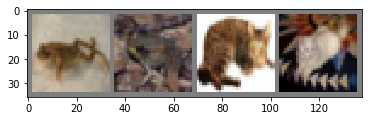

In [17]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy() 
  plt.imshow(np.transpose(npimg, (1,2,0)))
  

dataiter = iter(trainLoader)
images, labels = dataiter.next()

imshow(tv.utils.make_grid(images))
print(''.join('%5s'%classes[labels[j]] for j in range(4)))


In [18]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

**Define a CNN**

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = CNN()
    

**Loss Function and Optimizer**

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

**Train the network**

In [25]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainLoader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999: #print every 2000 mini batches
      print('[%d, %d] loss: %.3f' %(epoch + 1, i+1, running_loss/2000))
      running_loss = 0.0

print('finished training')

[1, 2000] loss: 1.188
[1, 4000] loss: 1.211
[1, 6000] loss: 1.219
[1, 8000] loss: 1.218
[1, 10000] loss: 1.175
[1, 12000] loss: 1.192
[2, 2000] loss: 1.097
[2, 4000] loss: 1.087
[2, 6000] loss: 1.109
[2, 8000] loss: 1.095
[2, 10000] loss: 1.097
[2, 12000] loss: 1.083
finished training


In [0]:
for i, data in enumerate(trainLoader, 0):
  print(data)

**Save only model parameters**

In [0]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(),PATH)

**Save entire model**

In [27]:
torch.save(model,PATH)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MaxPool2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


**Predictions**

Ground truth:    cat ship shipplane


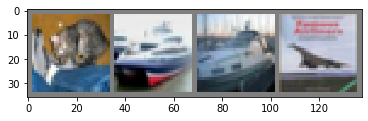

In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(tv.utils.make_grid(images))
print('Ground truth: ',''.join('%5s'%classes[labels[j]] for j in range(4)))

In [0]:
predictions = model(images)

In [30]:
_,predicted = torch.max(predictions,1)
print('Predictions: ',''.join('%5s'%classes[predicted[j]] for j in range(4)))

Predictions:    cat ship  carplane


In [40]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = model(images)
    #print(outputs)
    _,predicted = torch.max(outputs.data,1)
    total+=labels.size(0)
    #print(labels.size(0)) -> 4
    correct += (predicted == labels).sum().item()
    #print((predicted == labels).sum()) -> tensor(3), tensor(2)
    #print((predicted == labels).sum().item()) -> 3, 2, 4
    #print(correct)-> 3, 5, 9

print('Accuracy of the network on the 10000 test images: %d %%' %(100*correct/total))


Accuracy of the network on the 10000 test images: 61 %


In [46]:
print(torch.max(outputs.data,1))

torch.return_types.max(
values=tensor([4.6171, 6.1229, 2.5845, 9.0587]),
indices=tensor([6, 5, 1, 7]))


In [44]:
print(data)

[tensor([[[[-0.3647, -0.2863, -0.2314,  ..., -0.3569, -0.3333, -0.2627],
          [-0.3255, -0.2235, -0.1686,  ..., -0.1529, -0.0980, -0.0431],
          [-0.2392, -0.1843, -0.1373,  ..., -0.3412, -0.1451, -0.0196],
          ...,
          [ 0.2784,  0.2863,  0.0902,  ...,  0.1765,  0.0980,  0.1686],
          [ 0.2549,  0.3333,  0.1373,  ...,  0.2549,  0.1922, -0.0745],
          [-0.0588, -0.0902,  0.0667,  ...,  0.2157,  0.3412,  0.3098]],

         [[-0.5529, -0.4588, -0.4118,  ..., -0.2627, -0.2706, -0.2784],
          [-0.4824, -0.4353, -0.3569,  ..., -0.2471, -0.2549, -0.2549],
          [-0.4275, -0.3804, -0.3490,  ..., -0.2627, -0.2549, -0.2392],
          ...,
          [ 0.3961,  0.2471,  0.0431,  ...,  0.0980, -0.0353,  0.1686],
          [ 0.5373,  0.4824,  0.0824,  ...,  0.2706,  0.1843,  0.0118],
          [ 0.3020,  0.1922,  0.2941,  ...,  0.0902,  0.3098,  0.2863]],

         [[-0.6627, -0.5843, -0.5059,  ..., -0.0902, -0.1137, -0.2000],
          [-0.5765, -0.5451, 

**Device **


In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0
